In [1]:
using HTTP, CSV, DataFrames, StringEncodings, Plots

In [2]:
CONTENT_URL = "https://www.mhlw.go.jp/content/"

"https://www.mhlw.go.jp/content/"

In [3]:
OPEN_DATA_URL = "https://covid19.mhlw.go.jp/public/opendata/"

"https://covid19.mhlw.go.jp/public/opendata/"

In [4]:
POS_CSV = "newly_confirmed_cases_daily.csv"

"newly_confirmed_cases_daily.csv"

In [5]:
TST_CSV = "pcr_tested_daily.csv" 

"pcr_tested_daily.csv"

In [6]:
SVR_CSV = "severe_cases_daily.csv"

"severe_cases_daily.csv"

In [7]:
DTH_CSV = "deaths_cumulative_daily.csv"

"deaths_cumulative_daily.csv"

In [8]:
DL_DIR = "./"

"./"

In [9]:
HTTP.download(string(OPEN_DATA_URL, POS_CSV), DL_DIR)

┌ Info: Downloading
│   source = https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
│   dest = ./newly_confirmed_cases_daily.csv
│   progress = 1.0
│   time_taken = 0.05 s
│   time_remaining = 0.0 s
│   average_speed = 3.768 MiB/s
│   downloaded = 181.339 KiB
│   remaining = 0 bytes
│   total = 181.339 KiB
└ @ HTTP C:\Users\ume77\.julia\packages\HTTP\z8l0i\src\download.jl:132


"./newly_confirmed_cases_daily.csv"

In [10]:
HTTP.download(string(CONTENT_URL, TST_CSV), DL_DIR)

┌ Info: Downloading
│   source = https://www.mhlw.go.jp/content/pcr_tested_daily.csv
│   dest = ./pcr_tested_daily.csv
│   progress = 1.0
│   time_taken = 0.02 s
│   time_remaining = 0.0 s
│   average_speed = 1.199 MiB/s
│   downloaded = 18.410 KiB
│   remaining = 0 bytes
│   total = 18.410 KiB
└ @ HTTP C:\Users\ume77\.julia\packages\HTTP\z8l0i\src\download.jl:132


"./pcr_tested_daily.csv"

In [11]:
HTTP.download(string(OPEN_DATA_URL, SVR_CSV), DL_DIR)

┌ Info: Downloading
│   source = https://covid19.mhlw.go.jp/public/opendata/severe_cases_daily.csv
│   dest = ./severe_cases_daily.csv
│   progress = 1.0
│   time_taken = 0.1 s
│   time_remaining = 0.0 s
│   average_speed = 1.217 MiB/s
│   downloaded = 118.413 KiB
│   remaining = 0 bytes
│   total = 118.413 KiB
└ @ HTTP C:\Users\ume77\.julia\packages\HTTP\z8l0i\src\download.jl:132


"./severe_cases_daily.csv"

In [12]:
HTTP.download(string(OPEN_DATA_URL, DTH_CSV), DL_DIR)

┌ Info: Downloading
│   source = https://covid19.mhlw.go.jp/public/opendata/deaths_cumulative_daily.csv
│   dest = ./deaths_cumulative_daily.csv
│   progress = 1.0
│   time_taken = 0.14 s
│   time_remaining = 0.0 s
│   average_speed = 1.246 MiB/s
│   downloaded = 177.320 KiB
│   remaining = 0 bytes
│   total = 177.320 KiB
└ @ HTTP C:\Users\ume77\.julia\packages\HTTP\z8l0i\src\download.jl:132


"./deaths_cumulative_daily.csv"

In [13]:
ENCODING = enc"UTF-8"

UTF-8 string encoding

In [14]:
RATE_LIMIT = 10.0

10.0

In [15]:
pos_sum = 0

0

In [16]:
dth_sum = 0

0

In [17]:
function read_csv(file_path)
    df = CSV.File(open(read, file_path, ENCODING)) |> DataFrame
    return df
end

read_csv (generic function with 1 method)

In [18]:
df_pos = read_csv(string(DL_DIR, POS_CSV))

1127×49 DataFrame
  Row │ Date       ALL    Hokkaido  Aomori  Iwate  Miyagi  Akita  Yamagata  Fu ⋯
      │ String15   Int64  Int64     Int64   Int64  Int64   Int64  Int64     In ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 2020/1/16      1         0       0      0       0      0         0     ⋯
    2 │ 2020/1/17      0         0       0      0       0      0         0
    3 │ 2020/1/18      0         0       0      0       0      0         0
    4 │ 2020/1/19      0         0       0      0       0      0         0
    5 │ 2020/1/20      0         0       0      0       0      0         0     ⋯
    6 │ 2020/1/21      0         0       0      0       0      0         0
    7 │ 2020/1/22      0         0       0      0       0      0         0
    8 │ 2020/1/23      0         0       0      0       0      0         0
  ⋮   │     ⋮        ⋮       ⋮        ⋮       ⋮      ⋮       ⋮       ⋮         ⋱
 1121 │ 2023/2/9   32965      1022     154    265     605    191       243     ⋯
 1122 │ 2023/2/10  28639       956     183    250     532    176       236
 1123 │ 2023/2/11  27360       872     153    265     488    218       262
 1124 │ 2023/2/12  13683       326      59    104     337     41        75
 1125 │ 2023/2/13   9437       324      50     88     187     46        77     ⋯
 1126 │ 2023/2/14  31703      1090     200    394     613    282       306
 1127 │ 2023/2/15  28772       969     150    239     667    200       249
                                                41 columns and 1112 rows omitted

In [19]:
df_tst = read_csv(string(DL_DIR, TST_CSV))

1106×2 DataFrame
  Row │ 日付       PCR 検査実施人数(単日) 
      │ String15   Union{Missing, Int64}  
──────┼───────────────────────────────────
    1 │ 2020/2/5                        4
    2 │ 2020/2/6                       19
    3 │ 2020/2/7                        9
    4 │ 2020/2/8                        4
    5 │ 2020/2/9                       10
    6 │ 2020/2/10                      12
    7 │ 2020/2/11                       4
    8 │ 2020/2/12                      10
  ⋮   │     ⋮                ⋮
 1100 │ 2023/2/8                   165267
 1101 │ 2023/2/9                   198519
 1102 │ 2023/2/10                  128713
 1103 │ 2023/2/11                  158667
 1104 │ 2023/2/12                   61182
 1105 │ 2023/2/13                   30568
 1106 │ 2023/2/14                  131163
                         1091 rows omitted

In [20]:
df_svr = read_csv(string(DL_DIR, SVR_CSV))

1013×49 DataFrame
  Row │ Date       ALL    Hokkaido  Aomori  Iwate  Miyagi  Akita  Yamagata  Fu ⋯
      │ String15   Int64  Int64     Int64   Int64  Int64   Int64  Int64     In ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 2020/5/9     267        23       0      0       0      0         0     ⋯
    2 │ 2020/5/10    249        28       0      0       0      0         0
    3 │ 2020/5/11    243        26       0      0       0      0         0
    4 │ 2020/5/12    259        24       0      0       0      0         2
    5 │ 2020/5/13    245        19       0      0       0      0         2     ⋯
    6 │ 2020/5/14    237        18       0      0       0      0         2
    7 │ 2020/5/15    232        17       0      0       0      0         2
    8 │ 2020/5/16    230        18       0      0       0      0         2
  ⋮   │     ⋮        ⋮       ⋮        ⋮       ⋮      ⋮       ⋮       ⋮         ⋱
 1007 │ 2023/2/9     359         4       0      0       8      3         0     ⋯
 1008 │ 2023/2/10    326         5       0      0       7      2         0
 1009 │ 2023/2/11    314         4       0      0       5      2         0
 1010 │ 2023/2/12    291         4       0      0       4      3         0
 1011 │ 2023/2/13    286         4       0      0       4      3         0     ⋯
 1012 │ 2023/2/14    270         4       0      0       6      2         1
 1013 │ 2023/2/15    258         5       1      0       6      1         1
                                                 41 columns and 998 rows omitted

In [21]:
df_dth = read_csv(string(DL_DIR, DTH_CSV))

1013×49 DataFrame
  Row │ Date       ALL    Hokkaido  Aomori  Iwate  Miyagi  Akita  Yamagata  Fu ⋯
      │ String15   Int64  Int64     Int64   Int64  Int64   Int64  Int64     In ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 2020/5/9     613        48       0      0       1      0         0     ⋯
    2 │ 2020/5/10    621        51       0      0       1      0         0
    3 │ 2020/5/11    643        56       0      0       1      0         0
    4 │ 2020/5/12    668        62       0      0       1      0         0
    5 │ 2020/5/13    687        68       0      0       1      0         0     ⋯
    6 │ 2020/5/14    710        70       0      0       1      0         0
    7 │ 2020/5/15    725        72       0      0       1      0         0
    8 │ 2020/5/16    744        73       0      0       1      0         0
  ⋮   │     ⋮        ⋮       ⋮        ⋮       ⋮      ⋮       ⋮       ⋮         ⋱
 1007 │ 2023/2/9   70185      4446     633    592     907    575       350     ⋯
 1008 │ 2023/2/10  70377      4451     635    592     909    577       351
 1009 │ 2023/2/11  70558      4454     635    592     910    577       351
 1010 │ 2023/2/12  70695      4456     637    594     913    577       351
 1011 │ 2023/2/13  70788      4459     637    595     913    577       351     ⋯
 1012 │ 2023/2/14  70923      4462     637    596     914    578       351
 1013 │ 2023/2/15  71136      4469     637    596     917    578       351
                                                 41 columns and 998 rows omitted

In [22]:
function get_pos_sum(x)
    global pos_sum += x
    return pos_sum
end

get_pos_sum (generic function with 1 method)

In [23]:
function get_dth_day(x)
    global dth_sum
    y = dth_sum
    dth_sum = x
    return x - y
end

get_dth_day (generic function with 1 method)

In [24]:
df_pos = df_pos[:, [:"Date",:"ALL"]]

1127×2 DataFrame
  Row │ Date       ALL   
      │ String15   Int64 
──────┼──────────────────
    1 │ 2020/1/16      1
    2 │ 2020/1/17      0
    3 │ 2020/1/18      0
    4 │ 2020/1/19      0
    5 │ 2020/1/20      0
    6 │ 2020/1/21      0
    7 │ 2020/1/22      0
    8 │ 2020/1/23      0
  ⋮   │     ⋮        ⋮
 1121 │ 2023/2/9   32965
 1122 │ 2023/2/10  28639
 1123 │ 2023/2/11  27360
 1124 │ 2023/2/12  13683
 1125 │ 2023/2/13   9437
 1126 │ 2023/2/14  31703
 1127 │ 2023/2/15  28772
        1112 rows omitted

In [25]:
df_svr = df_svr[:, [:"Date",:"ALL"]]

1013×2 DataFrame
  Row │ Date       ALL   
      │ String15   Int64 
──────┼──────────────────
    1 │ 2020/5/9     267
    2 │ 2020/5/10    249
    3 │ 2020/5/11    243
    4 │ 2020/5/12    259
    5 │ 2020/5/13    245
    6 │ 2020/5/14    237
    7 │ 2020/5/15    232
    8 │ 2020/5/16    230
  ⋮   │     ⋮        ⋮
 1007 │ 2023/2/9     359
 1008 │ 2023/2/10    326
 1009 │ 2023/2/11    314
 1010 │ 2023/2/12    291
 1011 │ 2023/2/13    286
 1012 │ 2023/2/14    270
 1013 │ 2023/2/15    258
         998 rows omitted

In [26]:
df_dth = df_dth[:, [:"Date",:"ALL"]]

1013×2 DataFrame
  Row │ Date       ALL   
      │ String15   Int64 
──────┼──────────────────
    1 │ 2020/5/9     613
    2 │ 2020/5/10    621
    3 │ 2020/5/11    643
    4 │ 2020/5/12    668
    5 │ 2020/5/13    687
    6 │ 2020/5/14    710
    7 │ 2020/5/15    725
    8 │ 2020/5/16    744
  ⋮   │     ⋮        ⋮
 1007 │ 2023/2/9   70185
 1008 │ 2023/2/10  70377
 1009 │ 2023/2/11  70558
 1010 │ 2023/2/12  70695
 1011 │ 2023/2/13  70788
 1012 │ 2023/2/14  70923
 1013 │ 2023/2/15  71136
         998 rows omitted

In [27]:
rename!(df_pos, [:"日付",:"PCR 検査陽性者数(単日)"])

1127×2 DataFrame
  Row │ 日付       PCR 検査陽性者数(単日) 
      │ String15   Int64                  
──────┼───────────────────────────────────
    1 │ 2020/1/16                       1
    2 │ 2020/1/17                       0
    3 │ 2020/1/18                       0
    4 │ 2020/1/19                       0
    5 │ 2020/1/20                       0
    6 │ 2020/1/21                       0
    7 │ 2020/1/22                       0
    8 │ 2020/1/23                       0
  ⋮   │     ⋮                ⋮
 1121 │ 2023/2/9                    32965
 1122 │ 2023/2/10                   28639
 1123 │ 2023/2/11                   27360
 1124 │ 2023/2/12                   13683
 1125 │ 2023/2/13                    9437
 1126 │ 2023/2/14                   31703
 1127 │ 2023/2/15                   28772
                         1112 rows omitted

In [28]:
rename!(df_svr, [:"日付",:"重症者数"])

1013×2 DataFrame
  Row │ 日付       重症者数 
      │ String15   Int64    
──────┼─────────────────────
    1 │ 2020/5/9        267
    2 │ 2020/5/10       249
    3 │ 2020/5/11       243
    4 │ 2020/5/12       259
    5 │ 2020/5/13       245
    6 │ 2020/5/14       237
    7 │ 2020/5/15       232
    8 │ 2020/5/16       230
  ⋮   │     ⋮         ⋮
 1007 │ 2023/2/9        359
 1008 │ 2023/2/10       326
 1009 │ 2023/2/11       314
 1010 │ 2023/2/12       291
 1011 │ 2023/2/13       286
 1012 │ 2023/2/14       270
 1013 │ 2023/2/15       258
            998 rows omitted

In [29]:
df_svr[:, "重症者数(※50倍)"] = map(x -> (50 * x), df_svr[:, "重症者数"])

1013-element Vector{Int64}:
 13350
 12450
 12150
 12950
 12250
 11850
 11600
 11500
 11400
 10650
     ⋮
 20500
 19900
 17950
 16300
 15700
 14550
 14300
 13500
 12900

In [30]:
rename!(df_dth, [:"日付",:"死亡者数"])

1013×2 DataFrame
  Row │ 日付       死亡者数 
      │ String15   Int64    
──────┼─────────────────────
    1 │ 2020/5/9        613
    2 │ 2020/5/10       621
    3 │ 2020/5/11       643
    4 │ 2020/5/12       668
    5 │ 2020/5/13       687
    6 │ 2020/5/14       710
    7 │ 2020/5/15       725
    8 │ 2020/5/16       744
  ⋮   │     ⋮         ⋮
 1007 │ 2023/2/9      70185
 1008 │ 2023/2/10     70377
 1009 │ 2023/2/11     70558
 1010 │ 2023/2/12     70695
 1011 │ 2023/2/13     70788
 1012 │ 2023/2/14     70923
 1013 │ 2023/2/15     71136
            998 rows omitted

In [31]:
df_pos[:, "累積感染者数"] = map(x -> get_pos_sum(x), df_pos[:, :"PCR 検査陽性者数(単日)"])

1127-element Vector{Int64}:
        1
        1
        1
        1
        1
        1
        1
        1
        2
        3
        ⋮
 32539869
 32581441
 32614406
 32643045
 32670405
 32684088
 32693525
 32725228
 32754000

In [32]:
df_tmp = innerjoin(df_pos, df_tst, on = :日付)

1106×4 DataFrame
  Row │ 日付       PCR 検査陽性者数(単日)  累積感染者数  PCR 検査実施人数(単日 ⋯
      │ String15   Int64                   Int64         Union{Missing, Int64} ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 2020/2/5                        2            15                        ⋯
    2 │ 2020/2/6                        0            15                      1
    3 │ 2020/2/7                        0            15
    4 │ 2020/2/8                        0            15
    5 │ 2020/2/9                        0            15                      1 ⋯
    6 │ 2020/2/10                       0            15                      1
    7 │ 2020/2/11                       1            16
    8 │ 2020/2/12                       1            17                      1
  ⋮   │     ⋮                ⋮                  ⋮                  ⋮           ⋱
 1100 │ 2023/2/8                    41572      32581441                  16526 ⋯
 1101 │ 2023/2/9                    32965      32614406                  19851
 1102 │ 2023/2/10                   28639      32643045                  12871
 1103 │ 2023/2/11                   27360      32670405                  15866
 1104 │ 2023/2/12                   13683      32684088                   6118 ⋯
 1105 │ 2023/2/13                    9437      32693525                   3056
 1106 │ 2023/2/14                   31703      32725228                  13116
                                                  1 column and 1091 rows omitted

In [33]:
df_tmp2 = innerjoin(df_tmp, df_svr, on = :日付)

1012×6 DataFrame
  Row │ 日付       PCR 検査陽性者数(単日)  累積感染者数  PCR 検査実施人数(単日 ⋯
      │ String15   Int64                   Int64         Union{Missing, Int64} ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 2020/5/9                      108         15696                    226 ⋯
    2 │ 2020/5/10                      66         15762                    399
    3 │ 2020/5/11                      58         15820                    599
    4 │ 2020/5/12                      87         15907                     28
    5 │ 2020/5/13                      55         15962                   1007 ⋯
    6 │ 2020/5/14                      99         16061                    586
    7 │ 2020/5/15                      55         16116                    309
    8 │ 2020/5/16                      56         16172                    433
  ⋮   │     ⋮                ⋮                  ⋮                  ⋮           ⋱
 1006 │ 2023/2/8                    41572      32581441                  16526 ⋯
 1007 │ 2023/2/9                    32965      32614406                  19851
 1008 │ 2023/2/10                   28639      32643045                  12871
 1009 │ 2023/2/11                   27360      32670405                  15866
 1010 │ 2023/2/12                   13683      32684088                   6118 ⋯
 1011 │ 2023/2/13                    9437      32693525                   3056
 1012 │ 2023/2/14                   31703      32725228                  13116
                                                  3 columns and 997 rows omitted

In [34]:
df_dth[:, "死亡者数(単日)"] = map(x -> get_dth_day(x), df_dth[:, "死亡者数"])

1013-element Vector{Int64}:
 613
   8
  22
  25
  19
  23
  15
  19
   5
  14
   ⋮
 161
 200
 223
 192
 181
 137
  93
 135
 213

In [35]:
df_dth[:, "死亡者数(単日)(※50倍)"] = map(x -> (50 * x), df_dth[:, "死亡者数(単日)"])

1013-element Vector{Int64}:
 30650
   400
  1100
  1250
   950
  1150
   750
   950
   250
   700
     ⋮
  8050
 10000
 11150
  9600
  9050
  6850
  4650
  6750
 10650

In [36]:
df = innerjoin(df_tmp2, df_dth, on = :日付)

1012×9 DataFrame
  Row │ 日付       PCR 検査陽性者数(単日)  累積感染者数  PCR 検査実施人数(単日 ⋯
      │ String15   Int64                   Int64         Union{Missing, Int64} ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 2020/5/9                      108         15696                    226 ⋯
    2 │ 2020/5/10                      66         15762                    399
    3 │ 2020/5/11                      58         15820                    599
    4 │ 2020/5/12                      87         15907                     28
    5 │ 2020/5/13                      55         15962                   1007 ⋯
    6 │ 2020/5/14                      99         16061                    586
    7 │ 2020/5/15                      55         16116                    309
    8 │ 2020/5/16                      56         16172                    433
  ⋮   │     ⋮                ⋮                  ⋮                  ⋮           ⋱
 1006 │ 2023/2/8                    41572      32581441                  16526 ⋯
 1007 │ 2023/2/9                    32965      32614406                  19851
 1008 │ 2023/2/10                   28639      32643045                  12871
 1009 │ 2023/2/11                   27360      32670405                  15866
 1010 │ 2023/2/12                   13683      32684088                   6118 ⋯
 1011 │ 2023/2/13                    9437      32693525                   3056
 1012 │ 2023/2/14                   31703      32725228                  13116
                                                  6 columns and 997 rows omitted

In [37]:
df[:, "陽性率"] = df[:, "PCR 検査陽性者数(単日)"] ./ df[:, "PCR 検査実施人数(単日)"]

1012-element Vector{Float64}:
 0.04768211920529802
 0.016520650813516898
 0.00967795761722009
 0.3020833333333333
 0.005459598967639468
 0.016876917831571768
 0.01778783958602846
 0.012912151256629006
 0.005815119310206537
 0.005016722408026756
 ⋮
 0.5081116370164844
 0.3493485479276576
 0.2515444704629478
 0.1660546345689833
 0.2225027774972225
 0.17243661252812495
 0.22364420908110227
 0.3087215388641717
 0.24170688380107194

In [38]:
function get_rate_limited(rate)
    global RATE_LIMIT
    if rate > RATE_LIMIT
        rate = RATE_LIMIT
    end
    return rate
end

get_rate_limited (generic function with 1 method)

In [39]:
df[:, "陽性率"] = map(x -> get_rate_limited(x), df[:, "陽性率"])

1012-element Vector{Float64}:
 0.04768211920529802
 0.016520650813516898
 0.00967795761722009
 0.3020833333333333
 0.005459598967639468
 0.016876917831571768
 0.01778783958602846
 0.012912151256629006
 0.005815119310206537
 0.005016722408026756
 ⋮
 0.5081116370164844
 0.3493485479276576
 0.2515444704629478
 0.1660546345689833
 0.2225027774972225
 0.17243661252812495
 0.22364420908110227
 0.3087215388641717
 0.24170688380107194

In [40]:
df[:, "致死率"] = df[:, "死亡者数"] ./ df[:, "累積感染者数"]

1012-element Vector{Float64}:
 0.03905453618756371
 0.039398553483060525
 0.04064475347661188
 0.04199409065191425
 0.04303971933341687
 0.044206462860344936
 0.044986348969967734
 0.04600544150383379
 0.046231714091722734
 0.047008810301275336
 ⋮
 0.0021416736126462286
 0.002143893080823405
 0.0021472960634245737
 0.0021519631539510483
 0.0021559569580595194
 0.002159691623045383
 0.0021629791230521715
 0.0021651993781643306
 0.0021672270701979524

In [41]:
println(df)

1012×11 DataFrame
  Row │ 日付        PCR 検査陽性者数(単日)  累積感染者数  PCR 検査実施人数(単日)  重症者数  重症者数(※50倍)  死亡者数  死亡者数(単日)  死亡者数(単日)(※50倍)  陽性率        致死率     
      │ String15    Int64                   Int64         Union{Missing, Int64}   Int64     Int64            Int64     Int64           Int64                  Float64       Float64    
──────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │ 2020/5/9                       108         15696                    2265       267            13350       613             613                  30650   0.0476821    0.0390545
    2 │ 2020/5/10                       66         15762                    3995       249            12450       621               8                    400   0.0165207    0.0393986
    3 │ 2020/5/11                       58         15820                    5993       243            12150       643     

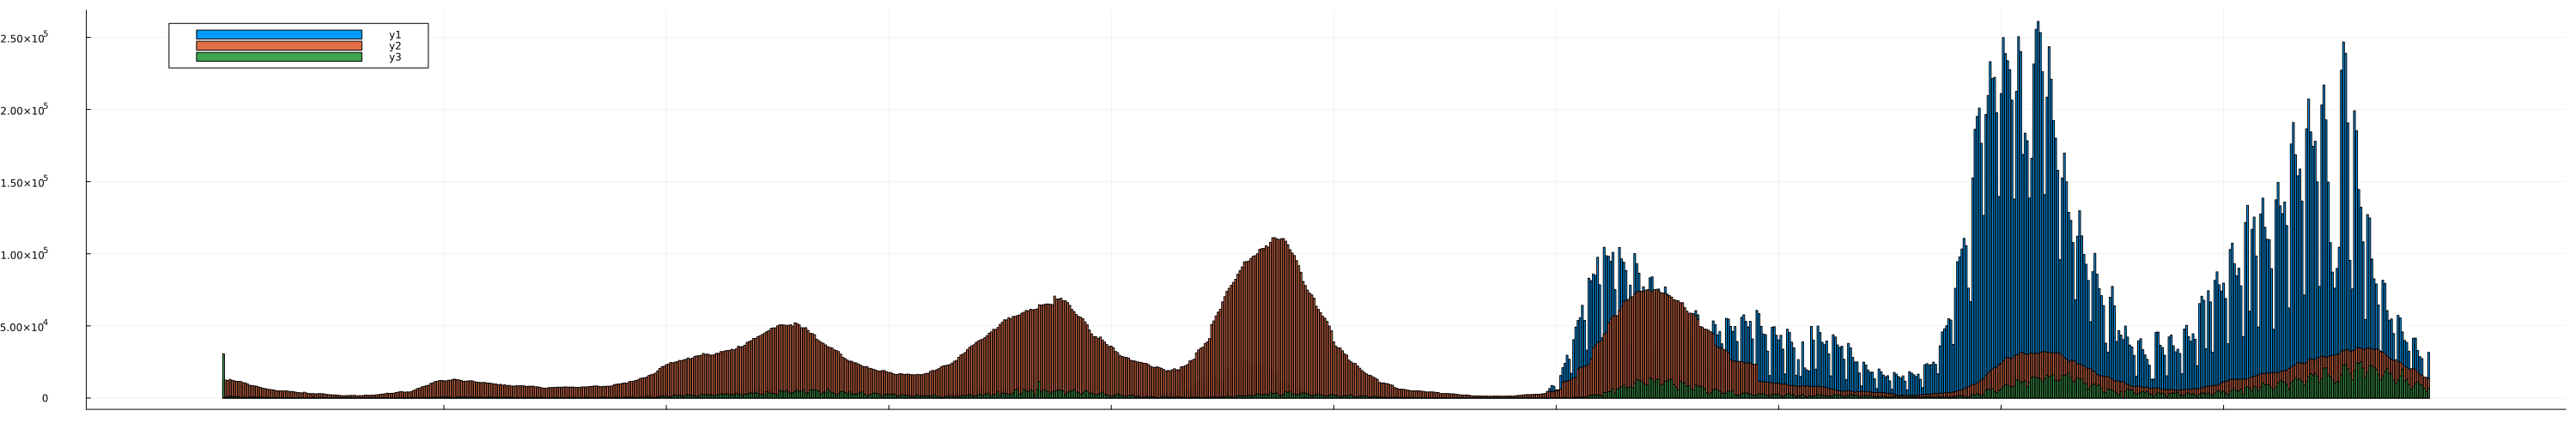

In [42]:
plot!(plot!(plot(
    df[:, "日付"], df[:, "PCR 検査陽性者数(単日)"], st=:bar, size=(3000, 500)),
    df[:, "日付"], df[:, "重症者数(※50倍)"], st=:bar, size=(3000, 500)),
    df[:, "日付"], df[:, "死亡者数(単日)(※50倍)"], st=:bar, size=(3000, 500))

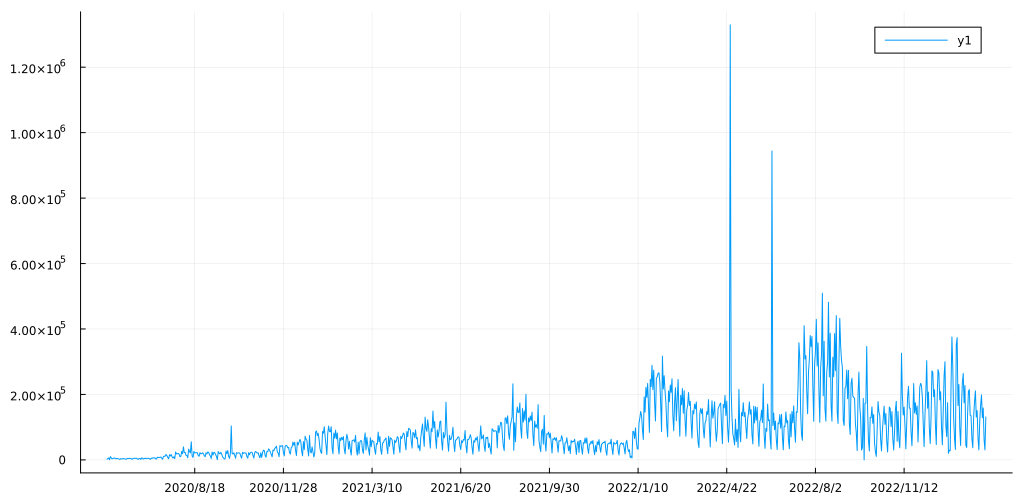

In [43]:
plot(df[:, "日付"], df[:, "PCR 検査実施人数(単日)"], size=(1024, 500))

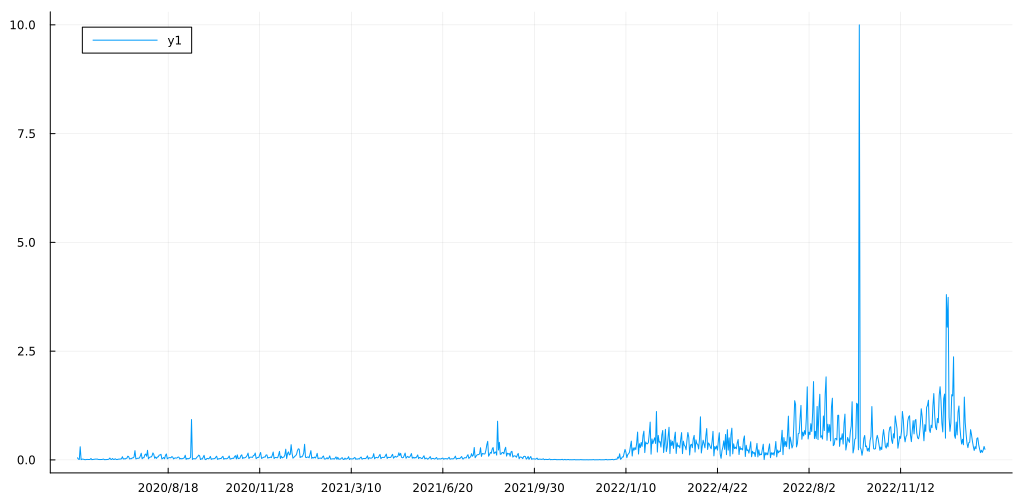

In [44]:
plot(df[:, "日付"], df[:, "陽性率"], size=(1024, 500))

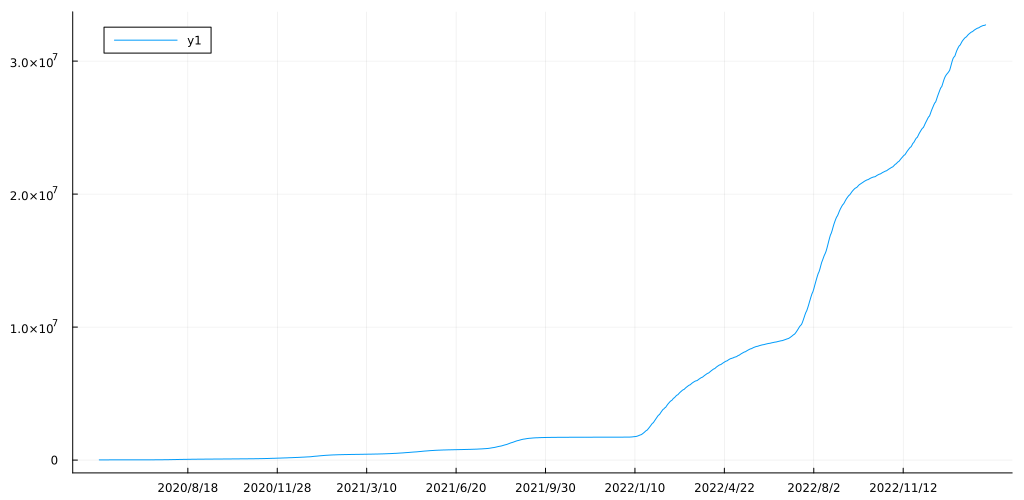

In [45]:
plot(df[:, "日付"], df[:, "累積感染者数"], size=(1024, 500))

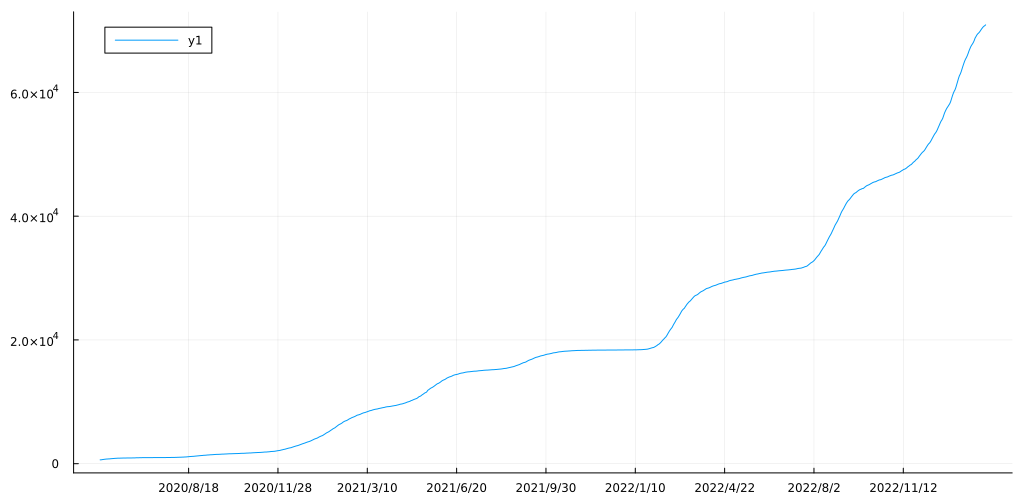

In [46]:
plot(df[:, "日付"], df[:, "死亡者数"], size=(1024, 500))

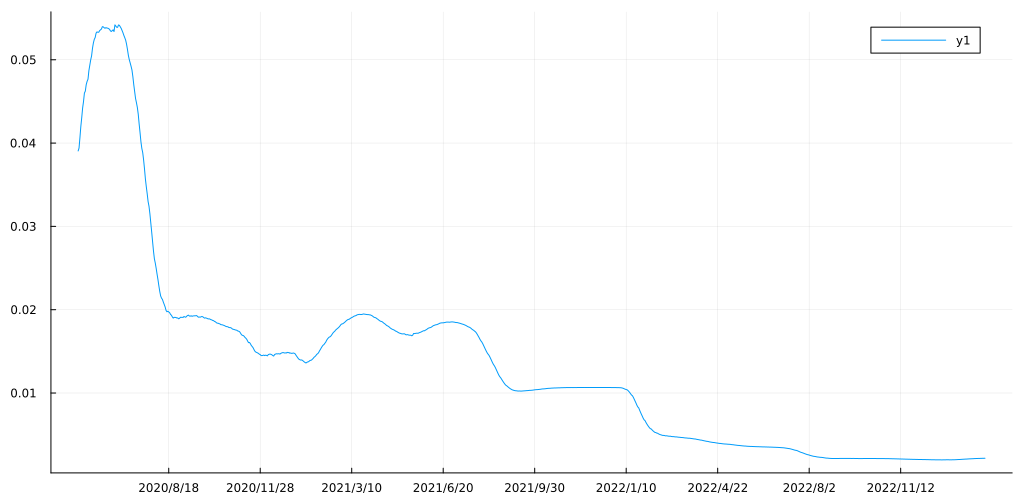

In [47]:
plot(df[:, "日付"], df[:, "致死率"], size=(1024, 500))